CNN with 2 layers

In [ ]:
# All the code lines in this cell are taken from Reference [4]

import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader


# train and validation data directory
train_data_dir = "images/images/train/"
validation_data_dir = "images/images/validation/"


# load the train and validation data
train_dataset = ImageFolder(train_data_dir,transform = transforms.Compose([
                transforms.ToTensor()
]))
validation_dataset = ImageFolder(validation_data_dir,transforms.Compose([
                transforms.ToTensor()
]))


# load the train and validation into batches.
train_dl = DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers = 4)

# Few changes (batch_size, shuffle = False) were made to val_dl object by referring to Reference[1]
val_dl = DataLoader(validation_dataset, batch_size = 128, shuffle = False, num_workers = 4)

# All the code lines in this cell are taken from Reference [1]

import torch.nn as nn # basic building block for neural networks
import torch.nn.functional as F # import convolution functions like Relu

class Net(nn.Module):
# Models a simple Convolutional Neural Network
	
    def __init__(self):
# initialize the network 
        super(Net, self).__init__() 

# The parameters of Conv2d and Linear layers are modified slightly from the original code.

# 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
    
# Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
         
        self.fc1 = nn.Linear(64 * 10 * 10, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 7)

    def forward(self, x):
# the forward propagation algorithm
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

# The parameters of view are modified slightly from the original code.        
        x = x.view(-1, 64 * 10 * 10)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

# All the code lines in this cell are taken from Reference [1]

import torch.optim as optim # optimizer

criterion = nn.CrossEntropyLoss()

# 'lr' value is modified from the original code.
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

# The below code lines are taken from Reference [1]

# 'Number of epochs'is modified from the original code.
import time                       # code line referred from Reference [7]

train_start_time = time.time()    # code line referred from Reference [7]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(train_dl, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# The below code lines are taken from Reference [5]
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
       
        train_loss1=running_loss/len(train_dl)
        accu1=100.*correct/total
   
train_end_time = time.time()                      # code line referred from Reference [7]
t_time1 = train_end_time - train_start_time       # code line referred from Reference [7]
       
print("Training time : %.2fs"%(t_time1))          # code line referred from Reference [7]

print('\nLoss for train dataset : %.3f | Accuracy for train dataset : %.3f'%(train_loss1,accu1))

# The below code lines are taken from Reference [1]
# 'Number of epochs' is modified from the original code.

for epoch in range(10):
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_dl:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

# The below code lines are taken from Reference [5]
            test_loss1=running_loss/len(val_dl)
            test_accu1=100.*correct/total
            

print('\nLoss for validation dataset : %.3f | Accuracy for validation dataset : %.3f'%(test_loss1,test_accu1))

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6400, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=7, bias=True)
)
Training time : 723.96s

Loss for train dataset : 1.179 | Accuracy for train dataset : 55.262

Loss for validation dataset : 4.758 | Accuracy for validation dataset : 51.727


CNN with 3 layers

In [ ]:
# All the code lines in this cell are taken from Reference [4]

import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader


# train and validation data directory
train_data_dir = "images/images/train/"
validation_data_dir = "images/images/validation/"


# load the train and validation data
train_dataset = ImageFolder(train_data_dir,transform = transforms.Compose([
                transforms.ToTensor()
]))
validation_dataset = ImageFolder(validation_data_dir,transforms.Compose([
                transforms.ToTensor()
]))


# load the train and validation into batches.
train_dl = DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers = 4)

# Few changes (batch_size, shuffle = False) were made to val_dl object by referring to Reference[1]
val_dl = DataLoader(validation_dataset, batch_size = 128, shuffle = False, num_workers = 4)

# All the code lines in this cell are taken from Reference [1]

import torch.nn as nn # basic building block for neural networks
import torch.nn.functional as F # import convolution functions like Relu

class Net(nn.Module):
# Models a simple Convolutional Neural Network
	
    def __init__(self):
# initialize the network 
        super(Net, self).__init__() 

# The parameters of Conv2d and Linear layers are modified slightly from the original code.

# 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)   # my own code by referring to above code lines
    
# Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
         
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 7)

    def forward(self, x):
# the forward propagation algorithm
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))      # my own code by referring to above code lines

# The parameters of view are modified slightly from the original code.        
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

# All the code lines in this cell are taken from Reference [1]

import torch.optim as optim # optimizer

criterion = nn.CrossEntropyLoss()

# 'lr' value is modified from the original code.
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

# The below code lines are taken from Reference [1]


# 'Number of epochs'is modified from the original code.
import time                                             # code line referred from Reference [7]

train_start_time = time.time()                          # code line referred from Reference [7]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(train_dl, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# The below code lines are taken from Reference [5]
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
       
        train_loss2=running_loss/len(train_dl)
        accu2=100.*correct/total
   
        #train_accu.append(accu)
        #train_losses.append(train_loss)

train_end_time = time.time()                                    # code line referred from Reference [7]
t_time2 = train_end_time - train_start_time                     # code line referred from Reference [7]
       
print("Training time : %.2fs"%(t_time2))                        # code line referred from Reference [7] 
print('\nLoss for train dataset : %.3f | Accuracy for train dataset : %.3f'%(train_loss2,accu2))

# The below code lines are taken from Reference [1]
# 'Number of epochs' is modified from the original code.

for epoch in range(10):
    
    #eval_losses=[]
    #eval_accu=[]
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_dl:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

# The below code lines are taken from Reference [5]
            test_loss2=running_loss/len(val_dl)
            test_accu2=100.*correct/total
            
            #eval_losses.append(test_loss)
            #eval_accu.append(accu)

print('\nLoss for validation dataset : %.3f | Accuracy for validation dataset : %.3f'%(test_loss2,test_accu2))

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=7, bias=True)
)


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training time : 843.70s

Loss for train dataset : 1.365 | Accuracy for train dataset : 47.583

Loss for validation dataset : 5.508 | Accuracy for validation dataset : 45.613


CNN with 4 layers

In [ ]:
# All the code lines in this cell are taken from Reference [4]

import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader


# train and validation data directory
train_data_dir = "images/images/train/"
validation_data_dir = "images/images/validation/"


# load the train and validation data
train_dataset = ImageFolder(train_data_dir,transform = transforms.Compose([
                transforms.ToTensor()
]))
validation_dataset = ImageFolder(validation_data_dir,transforms.Compose([
                transforms.ToTensor()
]))


# load the train and validation into batches.
train_dl = DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers = 4)

# Few changes (batch_size, shuffle = False) were made to val_dl object by referring to Reference[1]
val_dl = DataLoader(validation_dataset, batch_size = 128, shuffle = False, num_workers = 4)

# All the code lines in this cell are taken from Reference [1]

import torch.nn as nn # basic building block for neural networks
import torch.nn.functional as F # import convolution functions like Relu

class Net(nn.Module):
# Models a simple Convolutional Neural Network
	
    def __init__(self):
# initialize the network 
        super(Net, self).__init__() 

# The parameters of Conv2d and Linear layers are modified slightly from the original code.

# 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)     # my own code by referring to above code lines
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3)   # my own code by referring to above code lines
    
# Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
         
        self.fc1 = nn.Linear(256 * 1 * 1, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 7)

    def forward(self, x):
# the forward propagation algorithm
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))     # my own code by referring to above code lines
        x = self.pool(F.relu(self.conv4(x)))    # my own code by referring to above code lines

# The parameters of view are modified slightly from the original code.        
        x = x.view(-1, 256 * 1 * 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

# All the code lines in this cell are taken from Reference [1]

import torch.optim as optim # optimizer

criterion = nn.CrossEntropyLoss()

# 'lr' value is modified from the original code.
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

# The below code lines are taken from Reference [1]
#train_losses=[]
#train_accu=[]

# 'Number of epochs'is modified from the original code.
import time                                                 # code line referred from Reference [7]

train_start_time = time.time()                              # code line referred from Reference [7]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(train_dl, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# The below code lines are taken from Reference [5]
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
       
        train_loss3=running_loss/len(train_dl)
        accu3=100.*correct/total
   
        #train_accu.append(accu)
        #train_losses.append(train_loss)

train_end_time = time.time()                                # code line referred from Reference [7]
t_time3 = train_end_time - train_start_time                 # code line referred from Reference [7]
       
print("Training time : %.2fs"%(t_time3))                    # code line referred from Reference [7]   
print('\nLoss for train dataset : %.3f | Accuracy for train dataset : %.3f'%(train_loss3,accu3))

# The below code lines are taken from Reference [1]
# 'Number of epochs' is modified from the original code.

for epoch in range(10):
    
    #eval_losses=[]
    #eval_accu=[]
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_dl:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

# The below code lines are taken from Reference [5]
            test_loss3=running_loss/len(val_dl)
            test_accu3=100.*correct/total
            
            #eval_losses.append(test_loss)
            #eval_accu.append(accu)

print('\nLoss for validation dataset : %.3f | Accuracy for validation dataset : %.3f'%(test_loss3,test_accu3))

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=7, bias=True)
)


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training time : 813.67s

Loss for train dataset : 1.654 | Accuracy for train dataset : 34.201

Loss for validation dataset : 6.677 | Accuracy for validation dataset : 34.970


Plotting Loss, Accuracy and Training Time graphs

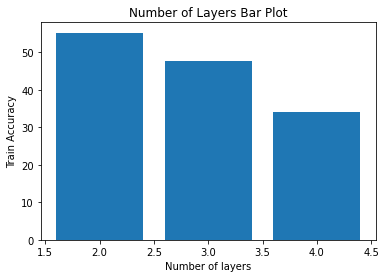

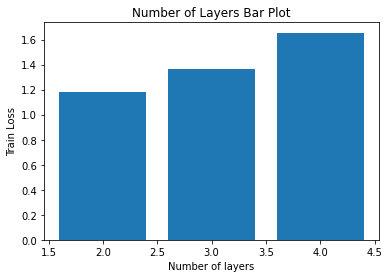

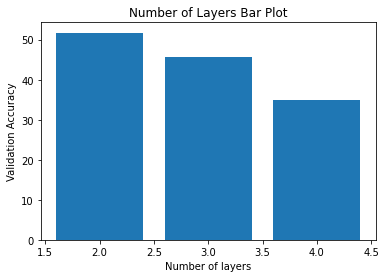

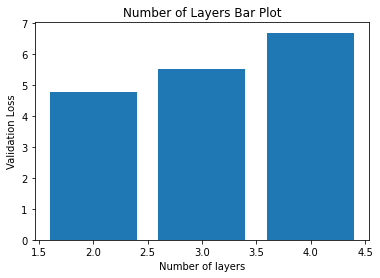

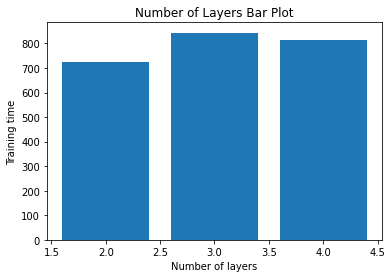

In [27]:
# All the code lines in this cell are referred from Reference[6]
import matplotlib.pyplot as plt

layers = [2, 3, 4]

train_losses=[train_loss1, train_loss2, train_loss3]
train_accu=[accu1, accu2, accu3]
validation_losses = [test_loss1, test_loss2, test_loss3]
validation_accuracy = [test_accu1, test_accu2, test_accu3]
training_time=[t_time1, t_time2, t_time3]

# Plotting bar chart for Accuracy of Train set over Number of Layers
#plt.subplot(1, 2, 2)
plt.bar(layers,train_accu)
plt.xlabel('Number of layers')
plt.ylabel("Train Accuracy")
plt.title('Number of Layers Bar Plot')
plt.show()

# Plotting bar chart for Loss of Train set over Number of Layers
#plt.subplot(1, 2, 1)
plt.bar(layers,train_losses)
plt.xlabel('Number of layers')
plt.ylabel("Train Loss")
plt.title('Number of Layers Bar Plot')
plt.show()

# Plotting bar chart for Accuracy of Validation set over Number of Layers
#plt.subplot(2, 2, 2)
plt.bar(layers,validation_accuracy)
plt.xlabel('Number of layers')
plt.ylabel("Validation Accuracy")
plt.title('Number of Layers Bar Plot')
plt.show()

# Plotting bar chart for Loss of Validation set over Number of Layers
#plt.subplot(2, 2, 1)
plt.bar(layers,validation_losses)
plt.xlabel('Number of layers')
plt.ylabel("Validation Loss")
plt.title('Number of Layers Bar Plot')
plt.show()

# Plotting bar chart for Training time over Number of Layers
#plt.subplot(3, 2, 2)
plt.bar(layers,training_time)
plt.xlabel('Number of layers')
plt.ylabel("Training time")
plt.title('Number of Layers Bar Plot')
plt.show()